In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### DATA UNDERSTANDING:




In [172]:
df = pd.read_csv("crop1_data.csv",encoding="Latin-1")

In [ ]:
df.head()

In [174]:
df.tail()

,Area,Item,Element,Year,Unit,Value
131249,Mauritania,Sorghum,Production,2011,tonnes,24619.0
131250,Mauritania,Sorghum,Production,2012,tonnes,126107.0
131251,Mauritania,Sorghum,Production,2013,tonnes,90970.0
131252,Mauritania,Sorghum,Production,2014,tonnes,57198.0
131253,Mauritania,Sorghum,Production,2015,tonnes,74636.0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131254 entries, 0 to 131253
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     131254 non-null  object 
 1   Item     131254 non-null  object 
 2   Element  131254 non-null  object 
 3   Year     131254 non-null  int64  
 4   Unit     131254 non-null  object 
 5   Value    120519 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [176]:
df.shape

(131254, 6)

### **DATA CLEANING**:

In [177]:
df.isnull().sum()

Area           0
Item           0
Element        0
Year           0
Unit           0
Value      10735
dtype: int64

In [178]:
new_df=df.dropna(axis=0,how='any')

In [179]:
new_df.isnull().sum()

Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64

In [180]:
new_df.shape

(120519, 6)

In [181]:
new_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
131249    False
131250    False
131251    False
131252    False
131253    False
Length: 120519, dtype: bool

In [213]:
temp=new_df.groupby("Year")["Value"].sum().reset_index()

In [214]:
req = temp.iloc[:,[0,1]].values
print(req)

[[1.96100000e+03 1.42963320e+09]
 [1.96200000e+03 1.46350834e+09]
 [1.96300000e+03 1.38660653e+09]
 [1.96400000e+03 1.47499412e+09]
 [1.96500000e+03 1.53959597e+09]
 [1.96600000e+03 1.58256303e+09]
 [1.96700000e+03 1.60860348e+09]
 [1.96800000e+03 1.68898921e+09]
 [1.96900000e+03 1.53962546e+09]
 [1.97000000e+03 1.64360259e+09]
 [1.97100000e+03 1.68720692e+09]
 [1.97200000e+03 1.62205442e+09]
 [1.97300000e+03 1.77538411e+09]
 [1.97400000e+03 1.58488766e+09]
 [1.97500000e+03 1.56122626e+09]
 [1.97600000e+03 1.60557591e+09]
 [1.97700000e+03 1.65786041e+09]
 [1.97800000e+03 1.75840676e+09]
 [1.97900000e+03 1.85485105e+09]
 [1.98000000e+03 1.85515737e+09]
 [1.98100000e+03 1.94722920e+09]
 [1.98200000e+03 2.08890581e+09]
 [1.98300000e+03 2.18741098e+09]
 [1.98400000e+03 2.37178832e+09]
 [1.98500000e+03 2.43389036e+09]
 [1.98600000e+03 2.47741152e+09]
 [1.98700000e+03 2.33135353e+09]
 [1.98800000e+03 2.36559150e+09]
 [1.98900000e+03 2.46979725e+09]
 [1.99000000e+03 2.45299135e+09]
 [1.991000

## **DATA VISUALIZATION**

Univariate Analysis:

<Axes: xlabel='count', ylabel='Item'>

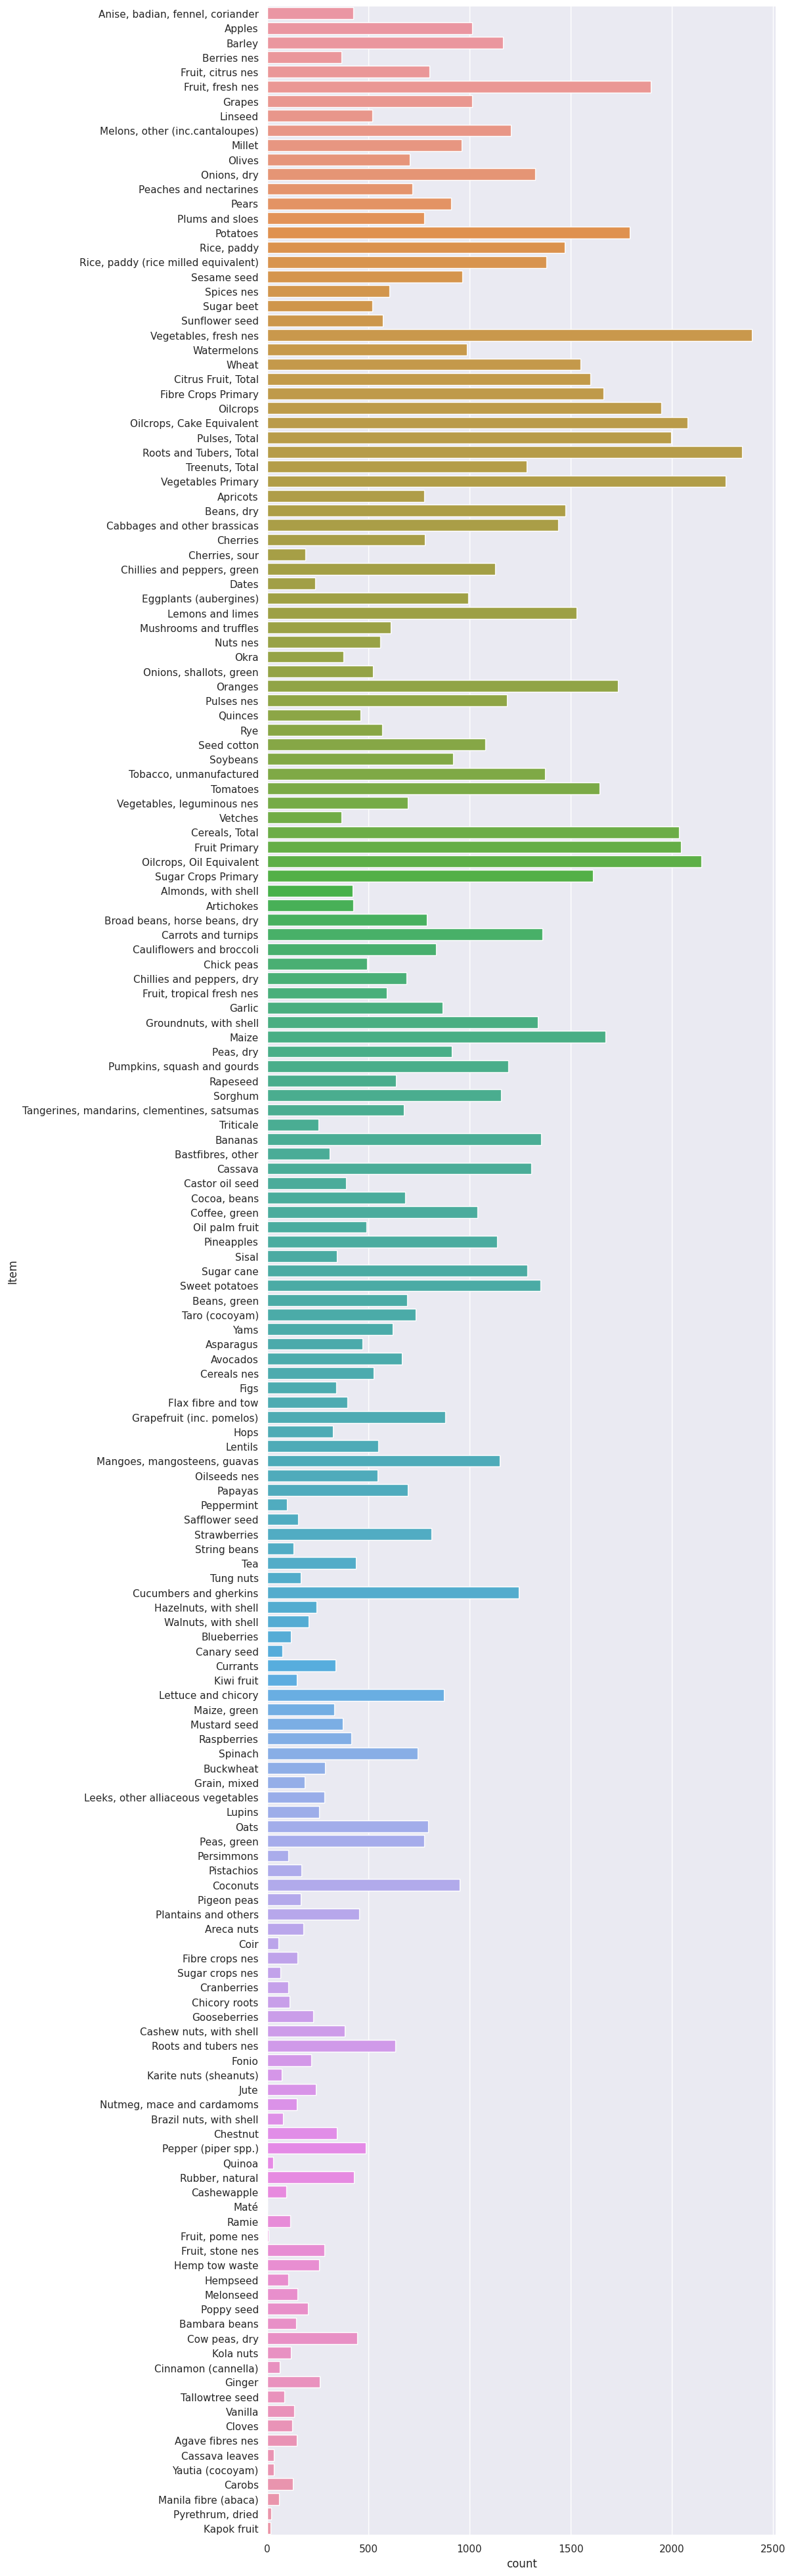

In [238]:
plt.figure(figsize=(10,50))
sns.countplot(y="Item",data=new_df)

Above countplot shows the number of data about production of the crop collected, and among those VEGETABLES data is more from year 1961 to 2019

Bivariate Analysis:

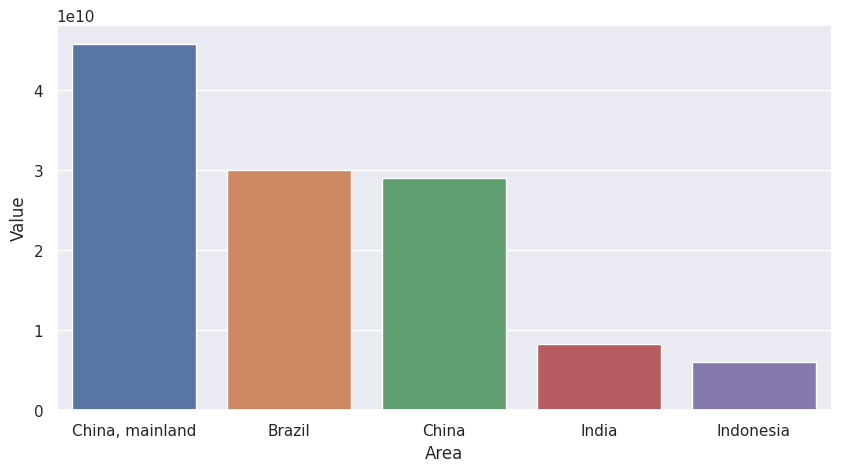

In [193]:
plt.figure(figsize=(10,5))
prod_by_country = df.groupby(by='Area')['Value'].sum().reset_index().sort_values("Value",ascending=False)
sns.barplot(x='Area',y='Value', data= prod_by_country.head())
plt.show()


The above graph show the top 5 countries in production of crops from year 1961 to 2019

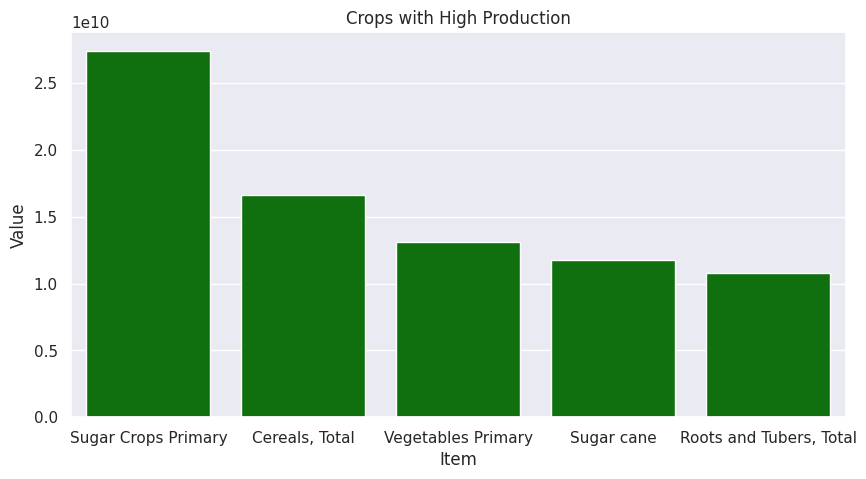

In [199]:
plt.figure(figsize=(10,5))
plt.title("Crops with High Production")
crop_by_prod = df.groupby("Item")["Value"].sum().reset_index().sort_values("Value",ascending=False)

sns.barplot(y='Value',x='Item', data=crop_by_prod.head(),color="Green")
plt.show()

From the above graph, It is clearly seen that Sugar Crops Primary has been produced more compared to other crops from 1961 to 2019

### Building Kmeans clustering Model by deciding the optimal number of clusters

In [215]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters =i,init="k-means++",random_state=40)
  kmeans.fit(req)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [216]:
print(wcss)

[1.111444011304499e+20, 2.2414642346353914e+19, 9.817470282246355e+18, 4.102776402542943e+18, 2.3735271981357957e+18, 1.5311312480276352e+18, 1.1556611225266616e+18, 9.545331189362309e+17, 7.810889715493569e+17, 5.855437891017312e+17]


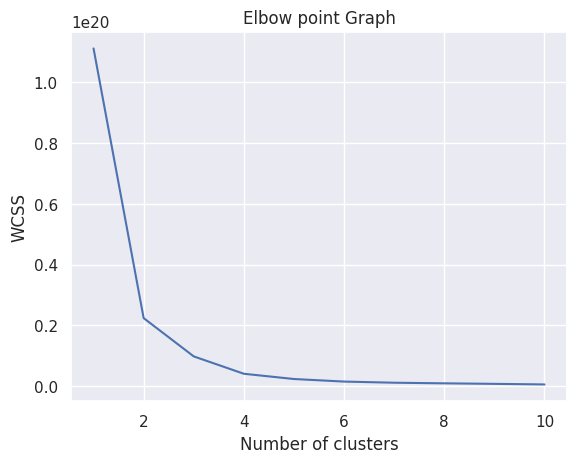

In [217]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From the above graph, We can conclude that we should take number of clusters as 4, as after the point 4, the inertia decreases in linear fashion
Therefore, Optimal number of clusters = 4

In [223]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=0)
label=kmeans.fit_predict(req)
print(label)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)


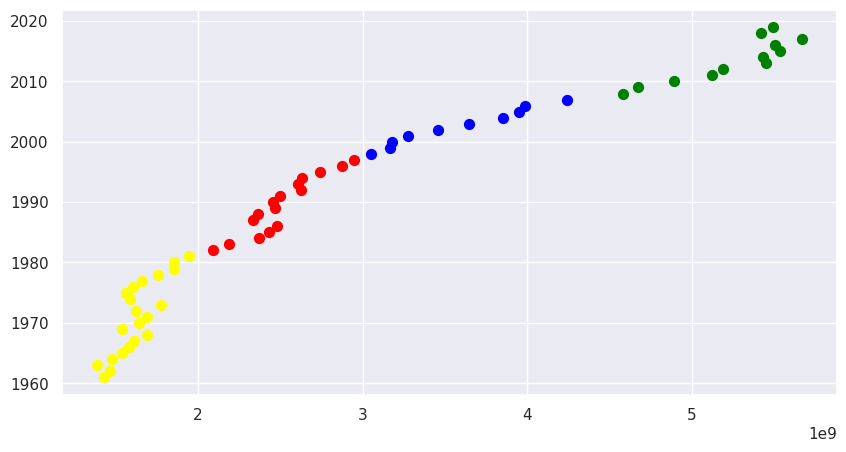

In [219]:
plt.figure(figsize=(10,5))
plt.scatter(req[label==0,1],req[label==0,0],s=50,c="green",label="cluster1")
plt.scatter(req[label==1,1],req[label==1,0],s=50,c="red",label="cluster2")
plt.scatter(req[label==2,1],req[label==2,0],s=50,c="blue",label="cluster3")
plt.scatter(req[label==3,1],req[label==3,0],s=50,c="yellow",label="cluster4")

plt.show()

So the year and their corresponding productions are clustered into 4 groups and they are plotted in the graph, Which portraits the huge increase in production with increase in year

In [232]:
for cluster_id in range(4):
    print(f"Cluster {cluster_id}:")
    cluster_data = temp[label == cluster_id]
    print(cluster_data)

Cluster 0:
    Year         Value
47  2008  4.584242e+09
48  2009  4.673277e+09
49  2010  4.893161e+09
50  2011  5.124312e+09
51  2012  5.191211e+09
52  2013  5.451147e+09
53  2014  5.431764e+09
54  2015  5.537421e+09
55  2016  5.507259e+09
56  2017  5.668671e+09
57  2018  5.421504e+09
58  2019  5.493227e+09
Cluster 1:
    Year         Value
21  1982  2.088906e+09
22  1983  2.187411e+09
23  1984  2.371788e+09
24  1985  2.433890e+09
25  1986  2.477412e+09
26  1987  2.331354e+09
27  1988  2.365592e+09
28  1989  2.469797e+09
29  1990  2.452991e+09
30  1991  2.500426e+09
31  1992  2.623647e+09
32  1993  2.605074e+09
33  1994  2.629306e+09
34  1995  2.738102e+09
35  1996  2.872227e+09
36  1997  2.948222e+09
Cluster 2:
    Year         Value
37  1998  3.049192e+09
38  1999  3.168738e+09
39  2000  3.177461e+09
40  2001  3.274962e+09
41  2002  3.458260e+09
42  2003  3.645994e+09
43  2004  3.852511e+09
44  2005  3.952142e+09
45  2006  3.989265e+09
46  2007  4.242802e+09
Cluster 3:
    Year     

Above represents the clustered data, from the result it is clearly seen that the result is clustered based on the total production value, for eg, the cluster 0 contains the production value ranging from 1.386607e+09 to 1.947229e+09, with their corresponding year




This way clustering the production and the year is really helpful to deal with huge amount of data